# Softlab Assignment - Data processing

<b>Prachi Kalantri - BT18SCE136 <br/>
Harshal Deshpande - BT18CSE079</b>

1) Imported Road Accidents Data datset from kaggle.com<br/>
2) Used Pandas module to load data from csv files into dataframes<br/>
3) Analysed the data using heatmaps from matplotlib<br/>
4) The next step was to plot a Pearson correlation matrix to identify the amount of linear relationship between variables in        order to gain insight into data and to determine whether linear based algorithms are suitable<br/>
5) Normalized the features that were not categorical<br/>
6) Train machine learning algorithms without weather related data included to predict accident severity<br/>
7) Compard accuracy achieved from different machine learning algorithms<br/>
8) Train machine learning algorithms with weather related data included<br/>
9) Compared accuracy achieved with and without considering weather conditions<br/>

In [1]:
# Importing necessary modules
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 70) # Since we're dealing with moderately sized dataframe,
pd.set_option('display.max_rows', 13)# max 13 columns and rows will be shown

In [2]:
df=pd.read_csv("./Kaagle_Upload.csv", sep=",", decimal=",", engine='python') # Read the data from a csv
df=df.dropna() # The dataset is huge, therefore, dropping any rows with missing values is fine
df.head()
df.isnull().sum().sum()

# First I select variables based on prefrence, then for df2 I add weather related conditions of:
#'road_surface_conditions','light_conditions','weather_conditions'
#Feel free to mix these variables up
df2 = df[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions','age_of_vehicle','sex_of_driver','age_of_driver','junction_location', 'junction_detail','junction_control','did_police_officer_attend_scene_of_accident','accident_severity','day_of_week']]
df1 = df[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail','junction_control','did_police_officer_attend_scene_of_accident','day_of_week','accident_severity']]


df1.replace(-1, np.nan, inplace=True) # -1 should be imputed to NaN to be recognized as missing in the next row
df1=df1.dropna() # I drop all the rows with missing data once again
df1.shape

df2.replace(-1, np.nan, inplace=True) # Same as previously 
df2=df2.dropna()
df2.shape

,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,hit_object_off_carriageway,1st_point_of_impact,was_vehicle_left_hand_drive?,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_(cc),propulsion_code,age_of_vehicle,driver_imd_decile,driver_home_area_type,vehicle_imd_decile,NUmber_of_Casualities_unique_to_accident_index,No_of_Vehicles_involved_unique_to_accident_index,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,number_of_casualties,date,day_of_week,time,local_authority_(district),local_authority_(highway),1st_road_class,1st_road_number,road_type,speed_limit,junction_detail,junction_control,2nd_road_class,2nd_road_number,pedestrian_crossing-human_control,pedestrian_crossing-physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,lsoa_of_accident_location,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
2,201506E098766,2,9,0,18,0,8,0,0,0,0,1,1,6,1,51,8,-1,-1,-1,-1,1,-1,1,2,383870.0,394420.0,-2.244322,53.446296,6,3,2,1,14/03/2015,7,1899-12-30 15:55:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,1,1,1,0,0,1,1,E01005178,1.0,1.0,1.0,51.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,0,1,1,1,1,50,8,4462,2,1,-1,1,-1,1,1,386710.0,395700.0,-2.201617,53.457881,6,3,1,1,42311,4,1899-12-30 10:15:00,102,E08000003,3,6,6,30,0,-1,-1,0,0,4,1,1,1,0,0,1,1,E01005232,1.0,3.0,2.0,34.0,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
5,201506E098780,2,1,0,9,0,5,0,0,0,0,1,1,6,1,46,8,-1,-1,-1,-1,1,-1,1,2,384280.0,395200.0,-2.238188,53.453319,6,3,2,1,42158,6,1899-12-30 08:03:00,102,E08000003,5,0,6,30,3,4,6,0,0,0,1,1,1,0,0,1,2,E01005242,1.0,1.0,1.0,46.0,8.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
6,201506E098792,1,3,0,4,0,2,0,0,0,0,1,1,1,2,27,6,50,1,8,-1,1,-1,1,2,383870.0,393730.0,-2.244286,53.440094,6,3,2,1,19/03/2015,5,1899-12-30 20:35:00,102,E08000003,3,5103,3,40,6,2,5,0,0,5,7,1,1,0,0,1,1,E01005279,1.0,1.0,2.0,27.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,3.0
8,201506E098804,1,9,0,14,0,1,0,0,0,0,4,1,6,1,24,5,1398,1,1,-1,1,-1,1,1,385110.0,395540.0,-2.225706,53.456400,6,3,1,1,19/03/2015,5,1899-12-30 17:15:00,102,E08000003,4,5117,3,30,3,2,6,0,0,5,1,1,1,0,0,1,1,E01005284,1.0,3.0,1.0,12.0,3.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,2.0


0

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(68210, 11)

(68121, 14)

In [3]:
# Took a subset of features from the previous cell. This is so I could narrow it more down 
df1 = df1[['special_conditions_at_site','pedestrian_movement','age_of_vehicle','sex_of_driver','age_of_driver','junction_location','junction_detail',
           'junction_control','day_of_week',
           'accident_severity']]

df2 = df2[['special_conditions_at_site','pedestrian_movement','road_surface_conditions','light_conditions','weather_conditions','age_of_vehicle','sex_of_driver','age_of_driver',
          'junction_location', 'junction_detail','junction_control',
          'accident_severity','day_of_week']]

df1.shape
df2.shape

(68210, 10)

(68121, 13)

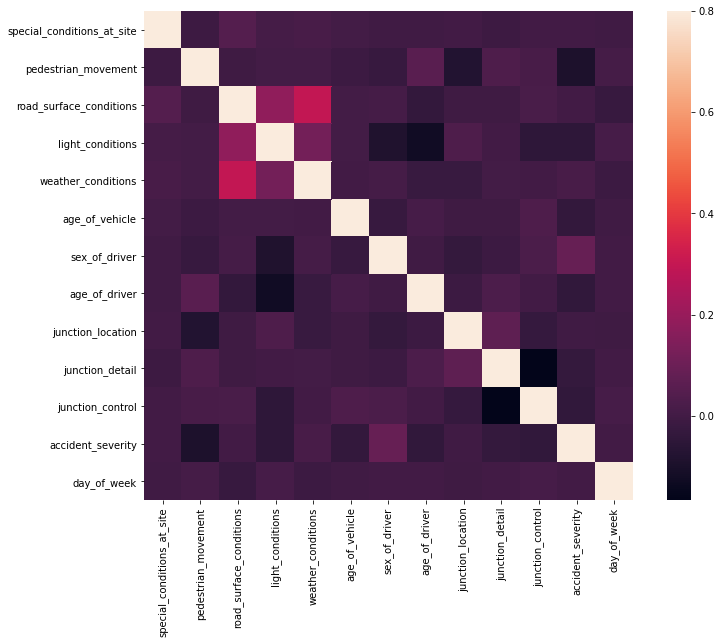

In [4]:
import matplotlib.pyplot as plt
corrmat = df2.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

plt.show()

The next step was to plot a Pearson correlation matrix to identify the amount of linear relationship between variables in order to gain insight into data and to determine whether linear based algorithms aresuitable. As seen by the graph, there no linear relationships present, besides between the added features of weather condition, road surface,and light condition.

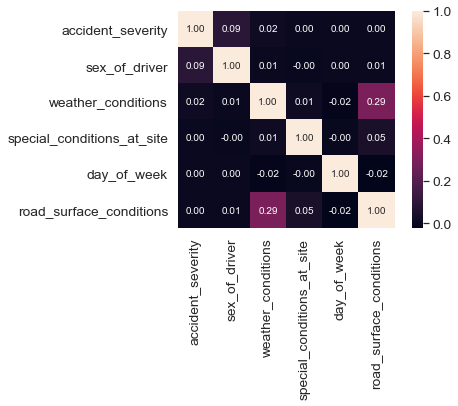

In [5]:
k = 6 #number of variables for heatmap
cols = corrmat.nlargest(k, 'accident_severity')['accident_severity'].index
cm = np.corrcoef(df2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
df2.head()

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,8.0,2.0,27.0,2.0,6.0,2.0,3,5
8,0.0,2.0,1.0,1,1,1.0,1.0,24.0,1.0,3.0,2.0,3,5
14,0.0,0.0,1.0,1,1,1.0,2.0,23.0,8.0,6.0,4.0,3,4
25,0.0,0.0,1.0,1,1,8.0,2.0,48.0,8.0,3.0,4.0,3,7
26,0.0,3.0,1.0,1,1,7.0,2.0,47.0,8.0,3.0,4.0,3,5


The next step was to normalize the only features that were not categorical: age of the driver and age of the car.

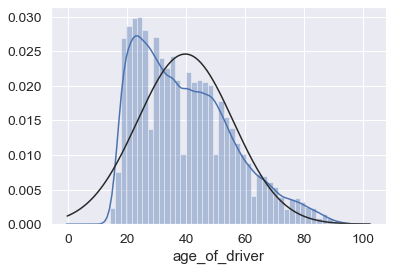

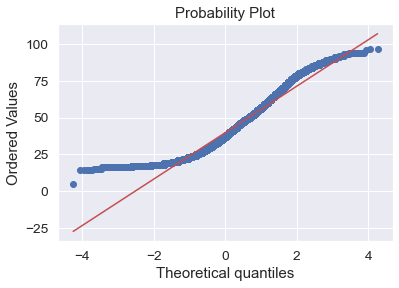

In [7]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

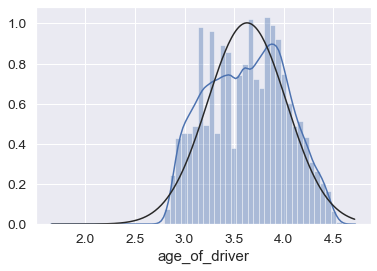

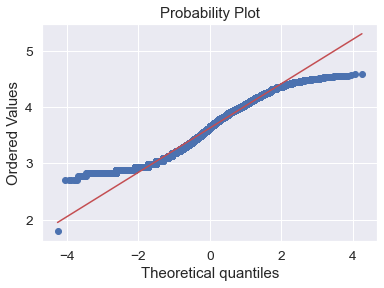

In [8]:
df2['age_of_driver'] = np.log1p(df2['age_of_driver']) 
df2['age_of_vehicle'] = np.log1p(df2['age_of_vehicle'])# standardise the feature

df1['age_of_driver'] = np.log1p(df1['age_of_driver']) 
df1['age_of_vehicle'] = np.log1p(df1['age_of_vehicle'])
sns.distplot(df1['age_of_driver'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['age_of_driver'], plot=plt)
plt.show()

In [9]:
df2

,special_conditions_at_site,pedestrian_movement,road_surface_conditions,light_conditions,weather_conditions,age_of_vehicle,sex_of_driver,age_of_driver,junction_location,junction_detail,junction_control,accident_severity,day_of_week
6,0.0,0.0,1.0,7,1,2.197225,2.0,3.332205,2.0,6.0,2.0,3,5
8,0.0,2.0,1.0,1,1,0.693147,1.0,3.218876,1.0,3.0,2.0,3,5
14,0.0,0.0,1.0,1,1,0.693147,2.0,3.178054,8.0,6.0,4.0,3,4
25,0.0,0.0,1.0,1,1,2.197225,2.0,3.891820,8.0,3.0,4.0,3,7
26,0.0,3.0,1.0,1,1,2.079442,2.0,3.871201,8.0,3.0,4.0,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257629,0.0,0.0,1.0,1,1,2.197225,2.0,3.931826,8.0,3.0,4.0,1,4
257639,0.0,0.0,1.0,1,1,1.945910,1.0,3.218876,1.0,3.0,4.0,3,7
257643,0.0,0.0,1.0,1,1,2.484907,1.0,4.094345,2.0,3.0,4.0,2,1
257649,0.0,0.0,2.0,1,2,2.639057,1.0,2.944439,8.0,3.0,4.0,3,5


In [10]:
df1= df1[:15000] #keep 1500 to decrease running times
df2= df2[:15000] #keep 15000

Y = df2.accident_severity.values
Y1 = df1.accident_severity.values
Y

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [11]:
cols = df2.shape[1]
X = df2.loc[:, df2.columns != 'accident_severity']
X1 = df1.loc[:, df1.columns != 'accident_severity']
X.columns;

X.shape
X1.shape

Index(['special_conditions_at_site', 'pedestrian_movement',
       'road_surface_conditions', 'light_conditions', 'weather_conditions',
       'age_of_vehicle', 'sex_of_driver', 'age_of_driver', 'junction_location',
       'junction_detail', 'junction_control', 'day_of_week'],
      dtype='object')

(15000, 12)

(15000, 9)

**Train machine learning algorithms without weather related data included**

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train1, X_test1,Y_train1,Y_test1 = train_test_split(X1, Y1, test_size=0.33, random_state=99)
#Without weather
svc = SVC()
svc.fit(X_train1, Y_train1)
Y_pred = svc.predict(X_test1)
acc_svc1 = round(svc.score(X_test1, Y_test1) * 100, 2)
acc_svc1

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train1, Y_train1)
Y_pred = knn.predict(X_test1)
acc_knn1 = round(knn.score(X_test1, Y_test1) * 100, 2)
acc_knn1


# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train1, Y_train1)
Y_pred = logreg.predict(X_test1)
acc_log1 = round(logreg.score(X_train1, Y_train1) * 100, 2)
acc_log1


# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train1, Y_train1)
Y_pred = gaussian.predict(X_test1)
acc_gaussian1 = round(gaussian.score(X_test1, Y_test1) * 100, 2)
acc_gaussian1

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train1, Y_train1)
Y_pred = perceptron.predict(X_test1)
acc_perceptron1 = round(perceptron.score(X_test1, Y_test1) * 100, 2)
acc_perceptron1

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train1, Y_train1)
Y_pred = linear_svc.predict(X_test1)
acc_linear_svc1 = round(linear_svc.score(X_test1, Y_test1) * 100, 2)
acc_linear_svc1

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train1, Y_train1)
Y_pred = sgd.predict(X_test1)
acc_sgd1 = round(sgd.score(X_test1, Y_test1) * 100, 2)
acc_sgd1

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, Y_train1)
Y_pred = decision_tree.predict(X_test1)
acc_decision_tree1 = round(decision_tree.score(X_test1, Y_test1) * 100, 2)
acc_decision_tree1

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train1, Y_train1)
Y_pred = random_forest.predict(X_test1)
random_forest.score(X_train1, Y_train1)
acc_random_forest1 = round(random_forest.score(X_test1, Y_test1) * 100, 2)
acc_random_forest1

SVC()

92.06

KNeighborsClassifier(n_neighbors=3)

90.4

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

92.47

GaussianNB()

90.0

Perceptron()

68.57

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

92.06

SGDClassifier()

92.06

DecisionTreeClassifier()

86.36

RandomForestClassifier()

0.9941293532338309

92.32

**Train machine learning algorithms without weather related data included**

In [13]:
# Support Vector Machines
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.33, random_state=99)
#with weather condition

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc
#KNN

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)
acc_gaussian

# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)
acc_perceptron

# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_test, Y_test) * 100, 2)
acc_linear_svc

# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)
acc_sgd

# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

SVC()

92.06

KNeighborsClassifier(n_neighbors=3)

90.2

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

92.47

GaussianNB()

87.94

Perceptron()

92.0

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

92.06

SGDClassifier()

92.06

DecisionTreeClassifier()

86.24

RandomForestClassifier()

0.9977114427860696

92.48

In [14]:
print("Machine Learning algorithm scores without weather related conditions")
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc1, acc_knn1, acc_log1, 
              acc_random_forest1, acc_gaussian1, acc_perceptron1, 
              acc_sgd1, acc_linear_svc1, acc_decision_tree1]})
models.sort_values(by='Score', ascending=False)
print("Machine Learning algorithm scores with weather related conditions")
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

Machine Learning algorithm scores without weather related conditions


,Model,Score
2,Logistic Regression,92.47
3,Random Forest,92.32
0,Support Vector Machines,92.06
6,Stochastic Gradient Decent,92.06
7,Linear SVC,92.06
1,KNN,90.40
4,Naive Bayes,90.00
8,Decision Tree,86.36
5,Perceptron,68.57


Machine Learning algorithm scores with weather related conditions


,Model,Score
3,Random Forest,92.48
2,Logistic Regression,92.47
0,Support Vector Machines,92.06
6,Stochastic Gradient Decent,92.06
7,Linear SVC,92.06
5,Perceptron,92.00
1,KNN,90.20
4,Naive Bayes,87.94
8,Decision Tree,86.24


**The results indicated that adding weather-related features to a machine learning algorithm in predicting severity of an accident did not substantially change the accuracy of models.**

In [15]:
# Confusion matrix with random forest without considering weather conditions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = df1.loc[:,df1.columns != 'accident_severity'], df1.loc[:,'accident_severity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
y_test.value_counts()

RandomForestClassifier(random_state=4)

Confusion matrix: 
 [[   3    0   23]
 [   1   51  276]
 [   0   38 4108]]
Classification report: 
               precision    recall  f1-score   support

           1       0.75      0.12      0.20        26
           2       0.57      0.16      0.24       328
           3       0.93      0.99      0.96      4146

    accuracy                           0.92      4500
   macro avg       0.75      0.42      0.47      4500
weighted avg       0.90      0.92      0.90      4500



3    4146
2     328
1      26
Name: accident_severity, dtype: int64

In [16]:
# Confusion matrix with random forest considering weather conditions
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
x,y = df2.loc[:,df2.columns != 'accident_severity'], df2.loc[:,'accident_severity']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 1)
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))
y_test.value_counts()

RandomForestClassifier(random_state=4)

Confusion matrix: 
 [[   3    0   23]
 [   0   50  278]
 [   0   25 4121]]
Classification report: 
               precision    recall  f1-score   support

           1       1.00      0.12      0.21        26
           2       0.67      0.15      0.25       328
           3       0.93      0.99      0.96      4146

    accuracy                           0.93      4500
   macro avg       0.87      0.42      0.47      4500
weighted avg       0.91      0.93      0.91      4500



3    4146
2     328
1      26
Name: accident_severity, dtype: int64